#Name - Swaruchi Chitrangad Mhatre

#Assignment: Predictive Modeling for Customer Churn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#1. Obtain a dataset of customer information, including demographic information, customer behavior, and whether or not the customer has churned.


In [2]:
data = pd.read_csv("/content/bank.csv")
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
data.describe(include = "all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
data.shape

(11162, 17)

#2. Perform data cleaning and preprocessing on the dataset, including handling missing data and converting categorical variables to numerical variables.

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [9]:
data["age"].value_counts()

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64

In [10]:
data["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [11]:
job_dummies = pd.get_dummies(data["job"], prefix = "job")
job_dummies.head(10)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
pd.concat([data["job"], job_dummies], axis = 1).head(10)

,job,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,admin.,1,0,0,0,0,0,0,0,0,0,0,0
1,admin.,1,0,0,0,0,0,0,0,0,0,0,0
2,technician,0,0,0,0,0,0,0,0,0,1,0,0
3,services,0,0,0,0,0,0,0,1,0,0,0,0
4,admin.,1,0,0,0,0,0,0,0,0,0,0,0
5,management,0,0,0,0,1,0,0,0,0,0,0,0
6,management,0,0,0,0,1,0,0,0,0,0,0,0
7,retired,0,0,0,0,0,1,0,0,0,0,0,0
8,technician,0,0,0,0,0,0,0,0,0,1,0,0
9,services,0,0,0,0,0,0,0,1,0,0,0,0


In [13]:
data = pd.concat([data, job_dummies], axis = 1)
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,...,0,1,0,0,0,0,0,0,0,0
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,...,0,0,0,0,0,0,0,0,0,0
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,...,0,0,0,0,0,0,0,1,0,0
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,...,0,0,0,0,0,0,0,0,0,0
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,...,0,0,0,0,0,0,0,0,0,0
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,...,0,0,0,0,0,0,0,0,0,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,...,0,0,0,0,0,1,0,0,0,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,...,0,0,0,0,0,0,0,1,0,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,...,0,0,0,0,0,0,0,1,0,0
11161,34,technician,married,secondary,no,0,no,no,cellular,9,...,0,0,0,0,0,0,0,1,0,0


In [14]:
data["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [15]:
marital_dummies = pd.get_dummies(data["marital"], prefix = "marital")
marital_dummies.head(10)

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,1,0
7,1,0,0
8,0,1,0
9,0,0,1


In [16]:
pd.concat([data["marital"], marital_dummies], axis = 1).head(10)

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,married,0,1,0
2,married,0,1,0
3,married,0,1,0
4,married,0,1,0
5,single,0,0,1
6,married,0,1,0
7,divorced,1,0,0
8,married,0,1,0
9,single,0,0,1


In [17]:
data = pd.concat([data, marital_dummies], axis = 1)
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,...,0,0,0,0,0,0,0,0,1,0
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,...,0,0,0,0,0,0,0,0,0,1
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,...,0,0,0,0,1,0,0,0,1,0
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,...,0,0,0,0,0,0,0,0,1,0
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,...,0,0,0,0,0,0,0,0,0,1
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,...,0,0,0,0,0,0,0,0,0,1
11158,39,services,married,secondary,no,733,no,no,unknown,16,...,0,0,1,0,0,0,0,0,1,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,...,0,0,0,0,1,0,0,0,0,1
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,...,0,0,0,0,1,0,0,0,1,0
11161,34,technician,married,secondary,no,0,no,no,cellular,9,...,0,0,0,0,1,0,0,0,1,0


In [18]:
data["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [19]:
education_dummies = pd.get_dummies(data["education"], prefix = "education")
education_dummies.head(10)

,education_primary,education_secondary,education_tertiary,education_unknown
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [20]:
pd.concat([data["education"], education_dummies], axis = 1).head(10)

,education,education_primary,education_secondary,education_tertiary,education_unknown
0,secondary,0,1,0,0
1,secondary,0,1,0,0
2,secondary,0,1,0,0
3,secondary,0,1,0,0
4,tertiary,0,0,1,0
5,tertiary,0,0,1,0
6,tertiary,0,0,1,0
7,secondary,0,1,0,0
8,secondary,0,1,0,0
9,secondary,0,1,0,0


In [21]:
data = pd.concat([data, education_dummies], axis = 1)
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,...,0,0,0,0,1,0,0,1,0,0
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,...,0,0,0,0,0,1,0,1,0,0
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,...,1,0,0,0,1,0,0,0,1,0
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,...,0,0,0,0,1,0,0,1,0,0
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,...,0,0,0,0,0,1,0,1,0,0
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,...,0,0,0,0,0,1,1,0,0,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,...,0,0,0,0,1,0,0,1,0,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,...,1,0,0,0,0,1,0,1,0,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,...,1,0,0,0,1,0,0,1,0,0
11161,34,technician,married,secondary,no,0,no,no,cellular,9,...,1,0,0,0,1,0,0,1,0,0


In [22]:
data["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [23]:
contact_dummies = pd.get_dummies(data["contact"], prefix = "contact")
contact_dummies.head(10)

,contact_cellular,contact_telephone,contact_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [24]:
pd.concat([data["contact"], contact_dummies], axis = 1).head(10)

,contact,contact_cellular,contact_telephone,contact_unknown
0,unknown,0,0,1
1,unknown,0,0,1
2,unknown,0,0,1
3,unknown,0,0,1
4,unknown,0,0,1
5,unknown,0,0,1
6,unknown,0,0,1
7,unknown,0,0,1
8,unknown,0,0,1
9,unknown,0,0,1


In [25]:
data = pd.concat([data, contact_dummies], axis = 1)
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,...,0,1,0,0,1,0,0,1,0,0
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,...,0,0,1,0,1,0,0,0,1,0
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,...,0,1,0,0,0,1,0,1,0,0
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,...,0,1,0,0,1,0,0,1,0,0
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,...,0,0,1,0,1,0,0,1,0,0
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,...,0,0,1,1,0,0,0,1,0,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,...,0,1,0,0,1,0,0,0,0,1
11159,32,technician,single,secondary,no,29,no,no,cellular,19,...,0,0,1,0,1,0,0,1,0,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,...,0,1,0,0,1,0,0,1,0,0
11161,34,technician,married,secondary,no,0,no,no,cellular,9,...,0,1,0,0,1,0,0,1,0,0


In [26]:
data["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [27]:
poutcome_dummies = pd.get_dummies(data["poutcome"], prefix = "poutcome")
poutcome_dummies.head(10)

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [28]:
pd.concat([data["poutcome"], poutcome_dummies], axis = 1).head(10)

,poutcome,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,unknown,0,0,0,1
1,unknown,0,0,0,1
2,unknown,0,0,0,1
3,unknown,0,0,0,1
4,unknown,0,0,0,1
5,unknown,0,0,0,1
6,unknown,0,0,0,1
7,unknown,0,0,0,1
8,unknown,0,0,0,1
9,unknown,0,0,0,1


In [29]:
data = pd.concat([data, poutcome_dummies], axis = 1)
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,...,1,0,0,1,0,0,0,0,0,1
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,...,1,0,0,0,1,0,0,0,0,1
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,...,0,1,0,1,0,0,0,0,0,1
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,...,1,0,0,1,0,0,1,0,0,0
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,...,1,0,0,1,0,0,0,0,0,1
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,...,0,0,0,1,0,0,0,0,0,1
11158,39,services,married,secondary,no,733,no,no,unknown,16,...,1,0,0,0,0,1,0,0,0,1
11159,32,technician,single,secondary,no,29,no,no,cellular,19,...,1,0,0,1,0,0,0,0,0,1
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,...,1,0,0,1,0,0,1,0,0,0
11161,34,technician,married,secondary,no,0,no,no,cellular,9,...,1,0,0,1,0,0,0,0,0,1


In [30]:
data["month"].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [31]:
data["month"] = data["month"].map({"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6,
                                   "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12})
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,...,1,0,0,1,0,0,0,0,0,1
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,...,1,0,0,0,1,0,0,0,0,1
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,...,0,1,0,1,0,0,0,0,0,1
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,...,1,0,0,1,0,0,1,0,0,0
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,...,1,0,0,1,0,0,0,0,0,1
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,...,0,0,0,1,0,0,0,0,0,1
11158,39,services,married,secondary,no,733,no,no,unknown,16,...,1,0,0,0,0,1,0,0,0,1
11159,32,technician,single,secondary,no,29,no,no,cellular,19,...,1,0,0,1,0,0,0,0,0,1
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,...,1,0,0,1,0,0,1,0,0,0
11161,34,technician,married,secondary,no,0,no,no,cellular,9,...,1,0,0,1,0,0,0,0,0,1


In [32]:
data["pdays"].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [33]:
data["was_contacted"] = data["pdays"].apply(lambda row: 0 if row == -1 else 1)
data[["pdays","was_contacted"]].head(10)

,pdays,was_contacted
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0
5,-1,0
6,-1,0
7,-1,0
8,-1,0
9,-1,0


In [34]:
data["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [35]:
data["is_default"] = data["default"].apply(lambda row: 1 if row == "yes" else 0)
data[["default","is_default"]].tail(10)

,default,is_default
11152,no,0
11153,no,0
11154,no,0
11155,no,0
11156,no,0
11157,no,0
11158,no,0
11159,no,0
11160,no,0
11161,no,0


In [36]:
data["housing"].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [37]:
data["is_housing"] = data["housing"].apply(lambda row: 1 if row == 'yes' else 0)
data[["housing","is_housing"]].tail(10)

,housing,is_housing
11152,yes,1
11153,no,0
11154,yes,1
11155,yes,1
11156,yes,1
11157,yes,1
11158,no,0
11159,no,0
11160,no,0
11161,no,0


In [38]:
data["housing"].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [39]:
data["is_loan"] = data["loan"].apply(lambda row: 1 if row == 'yes' else 0)
data[["loan", "is_loan"]].tail(10)

,loan,is_loan
11152,no,0
11153,no,0
11154,yes,1
11155,yes,1
11156,no,0
11157,no,0
11158,no,0
11159,no,0
11160,yes,1
11161,no,0


In [40]:
data["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [41]:
data["target"] = data["deposit"].apply(lambda row: 1 if row == 'yes' else 0)
data[["deposit", "target"]].tail(10)

,deposit,target
11152,no,0
11153,no,0
11154,no,0
11155,no,0
11156,no,0
11157,no,0
11158,no,0
11159,no,0
11160,no,0
11161,no,0


#3. Explore the data and perform feature selection to select the relevant features that will be used in the model.

In [42]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,was_contacted,is_default,is_housing,is_loan,target
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1,0,0,0,1,0,0,1,0,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1,0,0,0,1,0,0,0,0,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1,0,0,0,1,0,0,1,0,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,1,0,0,0,1,0,0,1,0,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,1,0,0,0,1,0,0,0,0,1
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,...,1,0,0,0,1,0,0,1,1,1
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,...,1,0,0,0,1,0,0,1,1,1
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,...,1,0,0,0,1,0,0,1,0,1
8,37,technician,married,secondary,no,1,yes,no,unknown,6,...,1,0,0,0,1,0,0,1,0,1
9,28,services,single,secondary,no,5090,yes,no,unknown,6,...,1,0,0,0,1,0,0,1,0,1


In [43]:
data.dtypes

age                     int64
job                    object
marital                object
education              object
default                object
balance                 int64
housing                object
loan                   object
contact                object
day                     int64
month                   int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
poutcome               object
deposit                object
job_admin.              uint8
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
job_unknown             uint8
marital_divorced        uint8
marital_married         uint8
marital_single          uint8
education_primary       uint8
education_

In [44]:
data.drop(["job", "marital", "education", "default", "housing", "loan", "contact", "pdays", "poutcome","deposit",
          "job_unknown", "marital_divorced", "education_unknown", "contact_unknown", "poutcome_unknown"],
           axis=1, inplace=True)

In [45]:
data.head(10)

,age,balance,day,month,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,was_contacted,is_default,is_housing,is_loan,target
0,59,2343,5,5,1042,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,56,45,5,5,1467,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,41,1270,5,5,1389,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,55,2476,5,5,579,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,54,184,5,5,673,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,42,0,5,5,562,2,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
6,56,830,6,5,1201,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
7,60,545,6,5,1030,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
8,37,1,6,5,608,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9,28,5090,6,5,1297,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [46]:
data.dtypes

age                    int64
balance                int64
day                    int64
month                  int64
duration               int64
campaign               int64
previous               int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
was_contacted          int64
is_default             int64
is_housing             int64
is_loan                int64
target                 int64
dtype: object

In [47]:
X = data.drop("target", axis = 1)
y = data["target"]

In [48]:
X.shape

(11162, 32)

In [49]:
y.shape

(11162,)

#4. Build a predictive model using machine learning algorithms such as Logistic Regression, Random Forest, or Gradient Boosting.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [51]:
X_train.shape

(8929, 32)

In [52]:
y_train.shape

(8929,)

In [53]:
X_test.shape

(2233, 32)

In [54]:
y_test.shape

(2233,)

In [55]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_pred = log.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [57]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

#6. Evaluate the model performance using metrics such as accuracy, precision, recall, F1-score and AUC-ROC.


In [58]:
accuracy_logistic_model = accuracy_score(y_pred = log_pred, y_true = y_test)
accuracy_random_forest_classifier = accuracy_score(y_pred = rfc_pred, y_true = y_test)
accuracy_gradient_boosting_classifier = accuracy_score(y_pred = gb_pred, y_true = y_test)

In [59]:
print("Accuracy Score of Logistic Regression Model:", accuracy_logistic_model)
print("Accuracy Score of Random Forest Classifier:", accuracy_random_forest_classifier)
print("Accuracy Score of Gradient Boosting Classifier:", accuracy_gradient_boosting_classifier)

Accuracy Score of Logistic Regression Model: 0.7895208240035826
Accuracy Score of Random Forest Classifier: 0.8504254366323332
Accuracy Score of Gradient Boosting Classifier: 0.8540080609046127


In [60]:
precision_logistic_model = precision_score(y_pred = log_pred, y_true = y_test)
precision_random_forest_classifier = precision_score(y_pred = rfc_pred, y_true = y_test)
precision_gradient_boosting_classifier = precision_score(y_pred = gb_pred, y_true = y_test)

In [61]:
print("Precision Score of Logistic Regression Model:", precision_logistic_model)
print("Precision Score of Random Forest Classifier:", precision_random_forest_classifier)
print("Precision Score of Gradient Boosting Classifier:", precision_gradient_boosting_classifier)

Precision Score of Logistic Regression Model: 0.7814634146341464
Precision Score of Random Forest Classifier: 0.8232094288304623
Precision Score of Gradient Boosting Classifier: 0.8310376492194674


In [62]:
recall_logistic_model = recall_score(y_pred = log_pred, y_true = y_test)
recall_random_forest_classifier = recall_score(y_pred = rfc_pred, y_true = y_test)
recall_gradient_boosting_classifier = recall_score(y_pred = gb_pred, y_true = y_test)

In [63]:
print("Recall Score of Logistic Regression Model:", recall_logistic_model)
print("Recall Score of Random Forest Classifier:", recall_random_forest_classifier)
print("Recall Score of Gradient Boosting Classifier:", recall_gradient_boosting_classifier)

Recall Score of Logistic Regression Model: 0.7650429799426934
Recall Score of Random Forest Classifier: 0.8672397325692455
Recall Score of Gradient Boosting Classifier: 0.8643744030563515


In [64]:
f1_logistic_model = f1_score(y_pred = log_pred, y_true = y_test)
f1_random_forest_classifier = f1_score(y_pred = rfc_pred, y_true = y_test)
f1_gradient_boosting_classifier = f1_score(y_pred = gb_pred, y_true = y_test)

In [65]:
print("F1 Score of Logistic Regression Model:", f1_logistic_model)
print("F1 Score of Random Forest Classifier:", f1_random_forest_classifier)
print("F1 Score of Gradient Boosting Classifier:", f1_gradient_boosting_classifier)

F1 Score of Logistic Regression Model: 0.7731660231660232
F1 Score of Random Forest Classifier: 0.8446511627906976
F1 Score of Gradient Boosting Classifier: 0.8473782771535581


#7. Fine-tune the model by trying different parameters or techniques to improve performance.

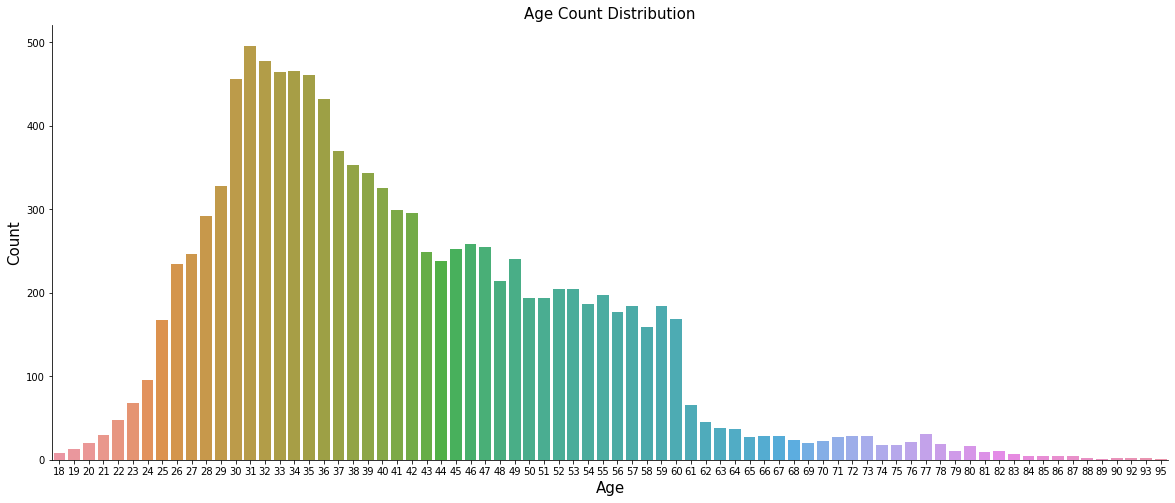

In [66]:
fig, ax = plt.subplots(figsize = (20, 8))
sns.countplot(x = "age", data = data)
ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Age Count Distribution", fontsize=15)
sns.despine()

#8. Create a report detailing the process and results, including the feature selection process, the model used, the evaluation metrics, and the performance of the final model.

#First of all, I import needed python libraries to import data and then read given csv dataset to further execution
#After importing data I check null values, duplicates values in dataset and cleaned the dataset after that covert all categorical columns and values in numerical values and remove unwanted columns from dataset
#Later, trained data and fit into Logestic Regression Model, Random Forest Classifier and Gradient Boosting Classifier and then find accuracy, precision, recall and f1 scores.